<a href="https://colab.research.google.com/github/thisaraniNJ/MachineLearning_CW/blob/main/MachineLearingCWbankfull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.4
    Uninstalling imbalanced-learn-0.12.4:
      Successfully uninstalled imbalanced-learn-0.12.4


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


Load the dataset

In [3]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ML CW/bank-full.csv', delimiter=";")

In [4]:
# Display the initial dataset structure
print("Dataset Overview: ")
print(df.info())

Dataset Overview: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [5]:
print("\nFirst 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
# Generate summary statistics for the DataFrame
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
del df['duration']  #delete duration

In [8]:
# Check whether the 'duration' column deleted succssefully
columns = df.columns
print(columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')


In [9]:
# Check whether is there are any duplicates in the dataset
df.duplicated().sum()

16

In [10]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [11]:
# After drop duplicates check again whether there's any duplicates
df.duplicated().sum()

0

Encode categorical variables

In [12]:
# Encode the target variable ('y') to binary (yes: 1, no: 0)
df['y'] = df['y'].map({
    'yes': 1,
    'no':0
})

In [13]:
# After changing the datatype of the target variable check whether it is correct or not
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45195 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45195 non-null  int64 
 1   job        45195 non-null  object
 2   marital    45195 non-null  object
 3   education  45195 non-null  object
 4   default    45195 non-null  object
 5   balance    45195 non-null  int64 
 6   housing    45195 non-null  object
 7   loan       45195 non-null  object
 8   contact    45195 non-null  object
 9   day        45195 non-null  int64 
 10  month      45195 non-null  object
 11  campaign   45195 non-null  int64 
 12  pdays      45195 non-null  int64 
 13  previous   45195 non-null  int64 
 14  poutcome   45195 non-null  object
 15  y          45195 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 5.9+ MB


In [14]:
# Check for class imbalance
y_counts = df['y'].value_counts()
print("Class distribution:")
print(y_counts)

Class distribution:
y
0    39906
1     5289
Name: count, dtype: int64


In [15]:
# Identify categorical columns
categorical_columns =[
    "job", "marital", "education", "default", "housing", "loan",
    "contact", "month", "poutcome"
]

In [16]:
# Replace 'unknown' with np.nan
df[categorical_columns] = df[categorical_columns].replace('unknown', np.nan)

# Fill missing values with mode (imputation)
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

Handle Missing values

In [17]:
# Check for missing values
print("\nMissing values in the dataset: ")
print(df.isnull().sum())


Missing values in the dataset: 
age                    0
balance                0
day                    0
campaign               0
pdays                  0
previous               0
y                      0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
default_yes            0
housing_yes            0
loan_yes               0
contact_telephone      0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
poutcome_other         0
poutcome_success       0
dtype: int64


In [18]:
print("After checking for missing values there is no any missing values in the columns.")

After checking for missing values there is no any missing values in the columns.


Feature Scaling

In [19]:
# Identify numerical columns
numerical_columns = [
    "age", "balance", "day","campaign","pdays","previous"
]

In [20]:
# Scale numerical columns using StandardScaler
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

Handle class imbalance

In [21]:
# Separate features and target variable
X = df.drop('y', axis=1)
y = df['y']

In [22]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

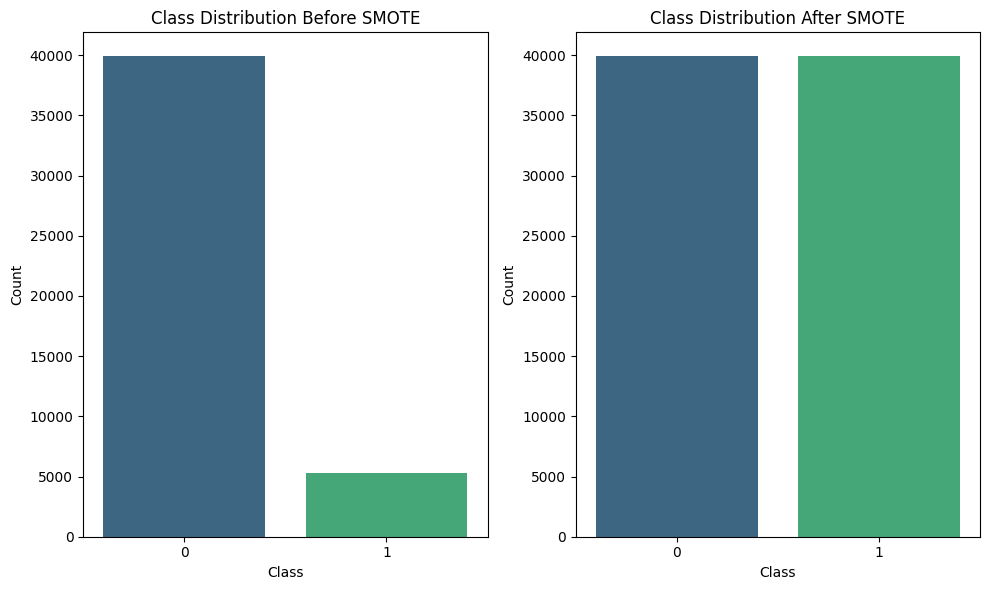

In [23]:
# Class distribution before and after SMOTE
plt.figure(figsize=(10, 6))

# Before SMOTE
plt.subplot(1, 2, 1)
sns.countplot(x=y, hue=y, palette="viridis", legend=False)
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")

# After SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled, hue=y_resampled, palette="viridis", legend=False)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


Train - Test split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

In [25]:
# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Display summary of the prepared dataset
print("\nTraining Dataset (X_train) Shape:", X_train.shape)
print("Test Dataset (X_test) Shape:", X_test.shape)
print("Training Target (y_train) Distribution:")
print(y_train.value_counts())
print("\nTest Target (y_test) Distribution:")
print(y_test.value_counts())


Training Dataset (X_train) Shape: (55868, 37)
Test Dataset (X_test) Shape: (23944, 37)
Training Target (y_train) Distribution:
y
0    27934
1    27934
Name: count, dtype: int64

Test Target (y_test) Distribution:
y
1    11972
0    11972
Name: count, dtype: int64


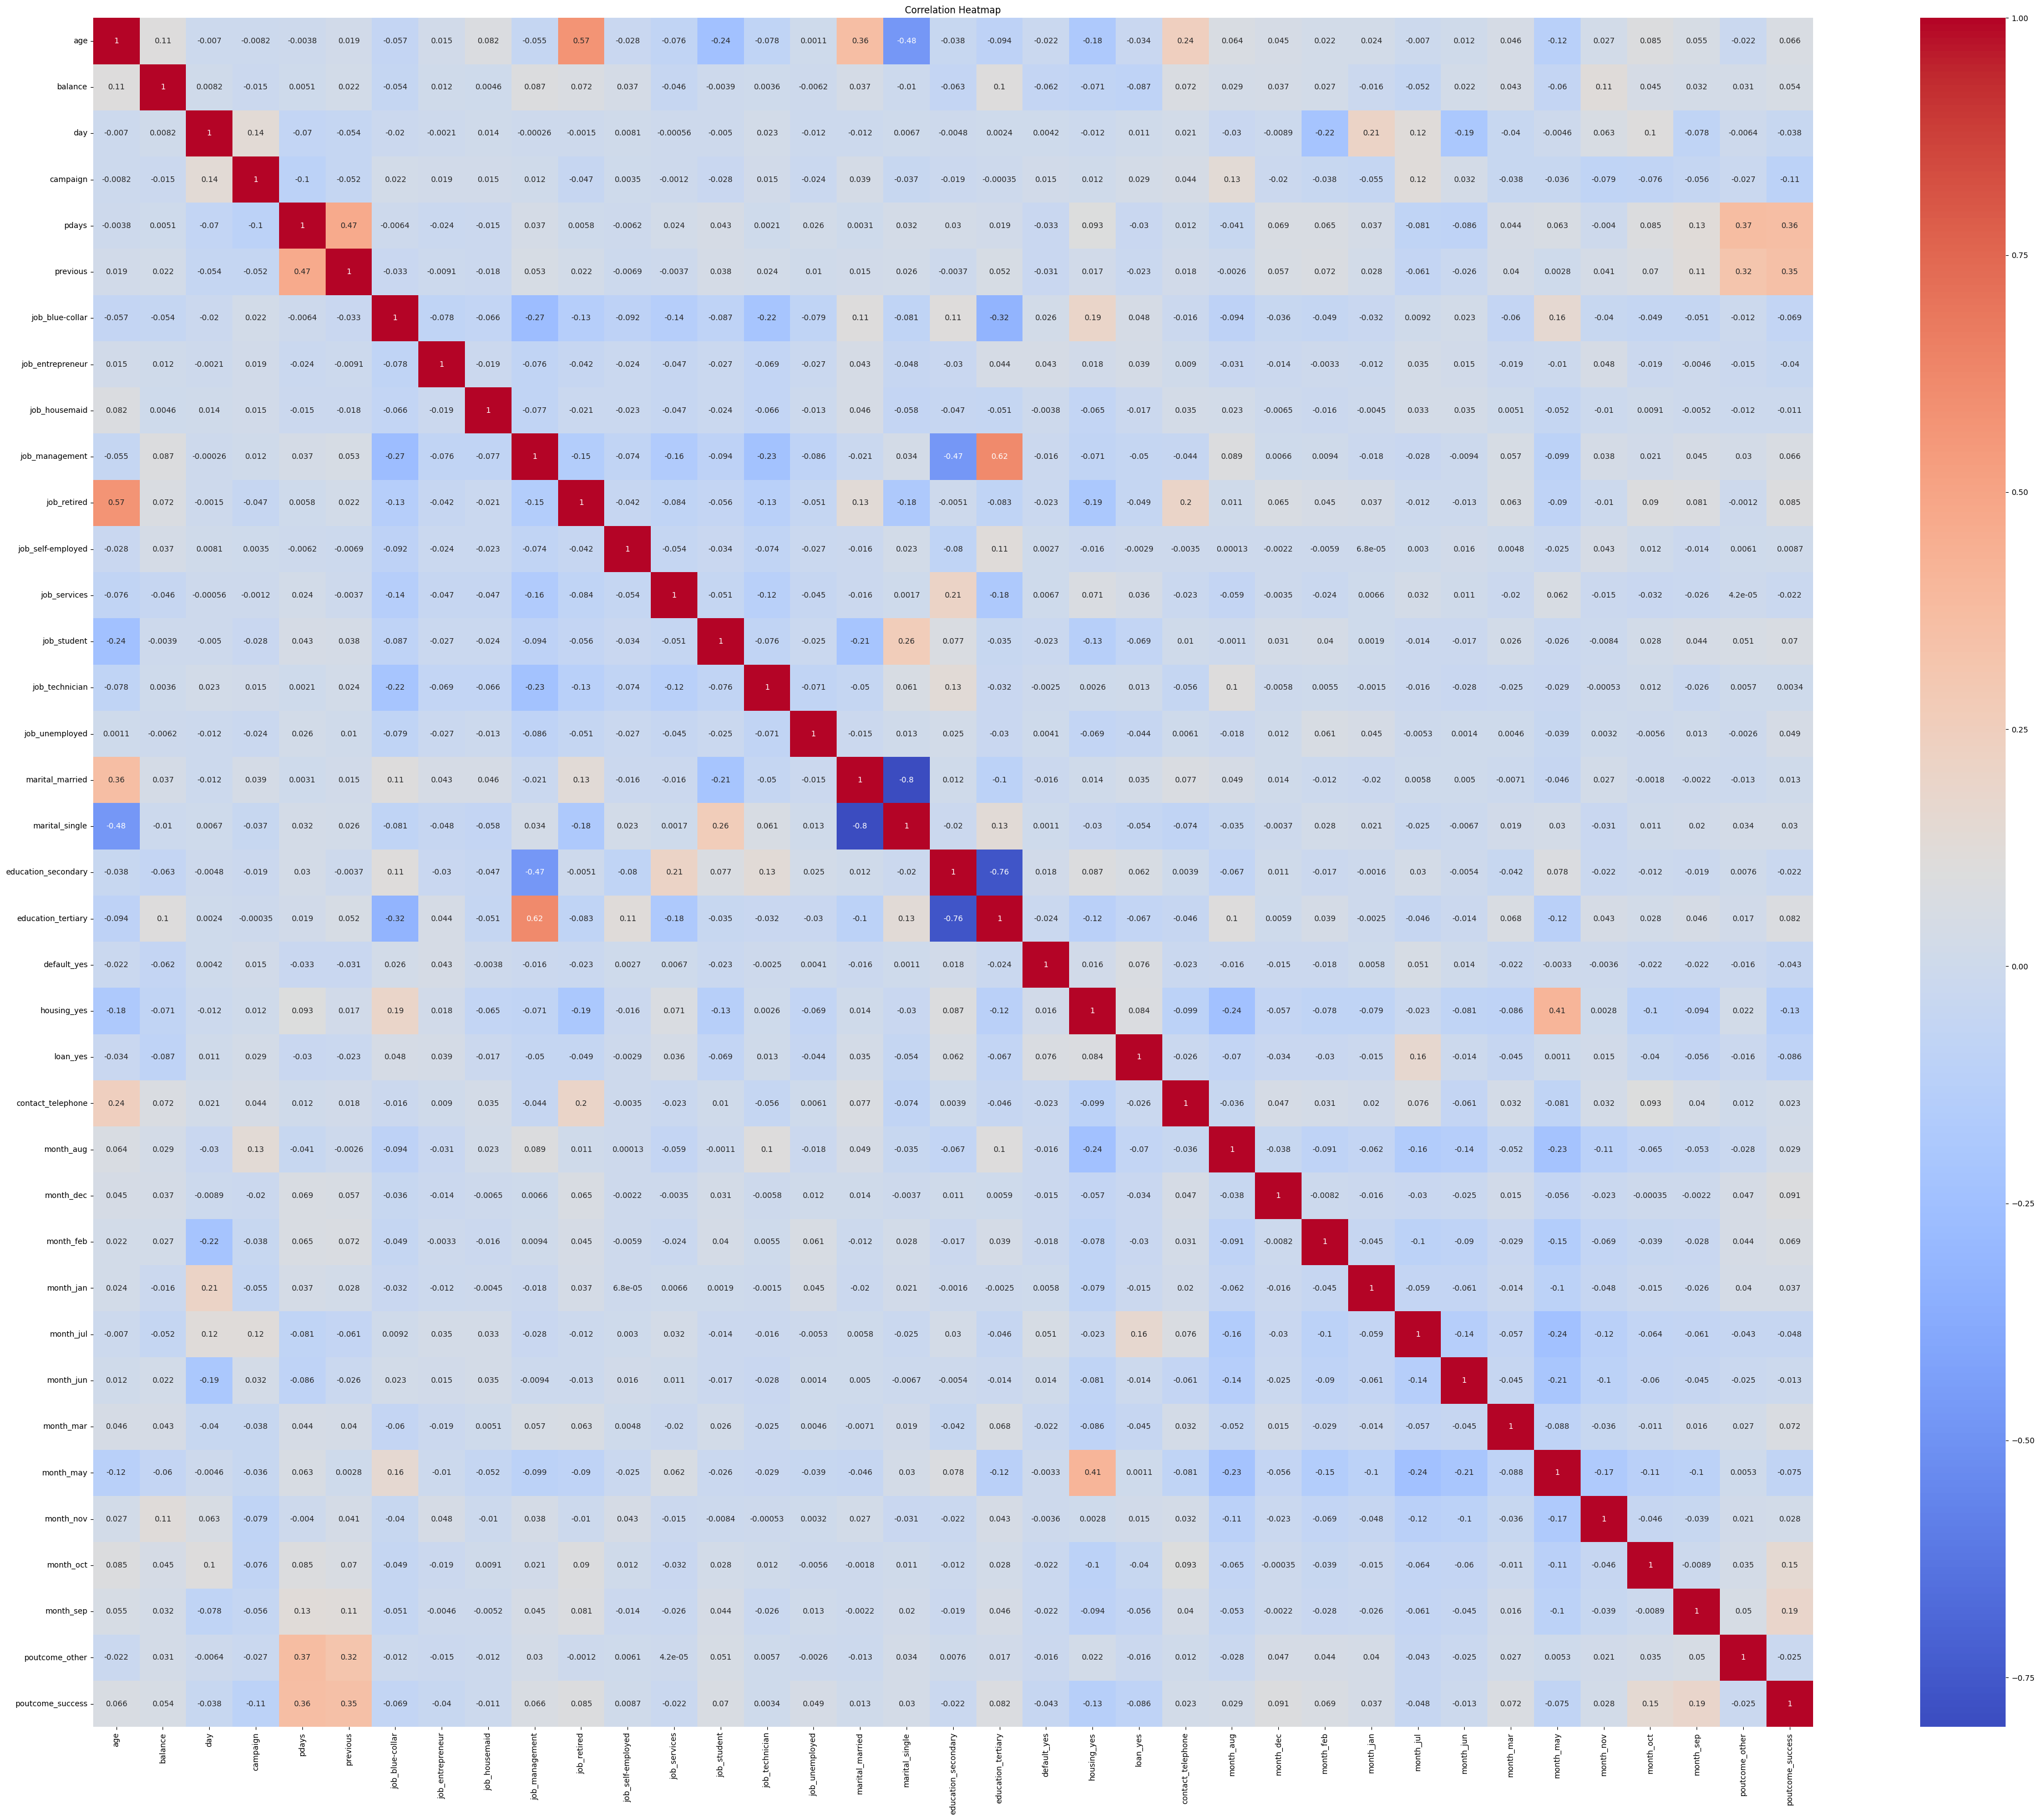

In [27]:
# Visualize correlation heatmap
plt.figure(figsize=(50, 40))
correlation_matrix = pd.DataFrame(X_resampled).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Neural Network Model

Import necessary libraries

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

Define the neural network model

In [29]:
# Define the Neural Network Model
def build_nn_model(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  # Define the input shape explicitly
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [30]:
# Initialize the model
input_dim = X_train.shape[1]  # Number of features
nn_model = build_nn_model(input_dim)

In [31]:
# Display model summary
print("\nNeural Network Model Summary:")
nn_model.summary()


Neural Network Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,185 (51.50 KB)

 Trainable params: 13,185 (51.50 KB)

 Non-trainable params: 0 (0.00 B)

Train the neural network model

In [32]:
batch_size = 32
epochs = 30

history = nn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1
)

Epoch 1/30
1746/1746 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6748 - loss: 0.5911 - val_accuracy: 0.7453 - val_loss: 0.5118
Epoch 2/30
1746/1746 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7343 - loss: 0.5241 - val_accuracy: 0.7589 - val_loss: 0.4837
Epoch 3/30
1746/1746 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7476 - loss: 0.5005 - val_accuracy: 0.7656 - val_loss: 0.4745
Epoch 4/30
1746/1746 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7544 - loss: 0.4872 - val_accuracy: 0.7685 - val_loss: 0.4641
Epoch 5/30
1746/1746 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7552 - loss: 0.4843 - val_accuracy: 0.7685 - val_loss: 0.4634
Epoch 6/30
1746/1746 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7592 - loss: 0.4764 - val_accuracy: 0.7733 - val_loss: 0.4558
Epoch 7/30
1746/1746 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7597 - loss: 0.4710 - val_accuracy: 0.7743 - val_loss: 0.4543
Epoch 8/30
1746/1746 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7661 - loss: 0.4664 -

Evaluate the Neural Network

In [33]:
print("\nEvaluating the Neural Network Model on Test Data:")
loss, accuracy = nn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Evaluating the Neural Network Model on Test Data:
Test Loss: 0.4169
Test Accuracy: 0.8043


Generate predictions and metrics

In [34]:
# Get predictions
y_pred_proba = nn_model.predict(X_test)  # Predicted probabilities
y_pred = (y_pred_proba > 0.5).astype("int32")

# Classification report
print("\nClassification Report for Neural Network:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score for Neural Network: {roc_auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

749/749 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80     11972
           1       0.81      0.80      0.80     11972

    accuracy                           0.80     23944
   macro avg       0.80      0.80      0.80     23944
weighted avg       0.80      0.80      0.80     23944

ROC AUC Score for Neural Network: 0.8931

Confusion Matrix:
[[9661 2311]
 [2375 9597]]


# Random Forest Classification

Import Libraries

In [35]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

Define and train the model and train the model

In [36]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=1000,        # Number of trees in the forest
    max_depth=None,          # Maximum depth of each tree
    random_state=42,         # For reproducibility
    class_weight='balanced'  # Handles class imbalance
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # For AUC computation

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print("Random Forest Classifier Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Random Forest Classifier Evaluation:
Accuracy: 0.9282
AUC: 0.9781

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     11972
           1       0.94      0.91      0.93     11972

    accuracy                           0.93     23944
   macro avg       0.93      0.93      0.93     23944
weighted avg       0.93      0.93      0.93     23944


Confusion Matrix:
[[11274   698]
 [ 1020 10952]]


# Comparison of the Neural Network and Random Forest Classifer

Import Necessary libraries

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_curve,
    auc,
    roc_auc_score,
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)


Create a list of models

In [38]:
# List of models to compare
models = [
    ("Neural Network", nn_model),
    ("Random Forest", rf_model),
]


Display Confusion Matrix of each model

749/749 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Neural Network Evaluation:
Accuracy: 0.8043
AUC: 0.8931

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80     11972
           1       0.81      0.80      0.80     11972

    accuracy                           0.80     23944
   macro avg       0.80      0.80      0.80     23944
weighted avg       0.80      0.80      0.80     23944


Confusion Matrix:
[[9661 2311]
 [2375 9597]]


<Figure size 600x600 with 0 Axes>

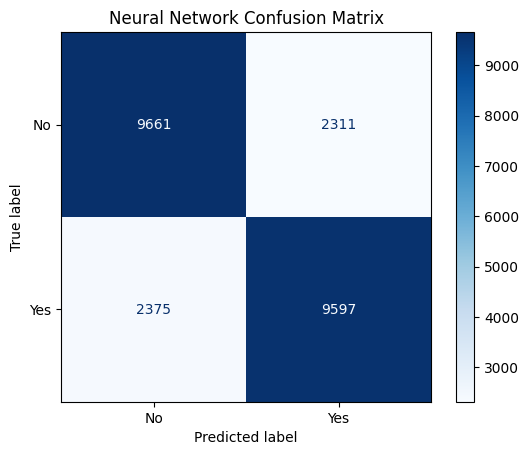


Random Forest Evaluation:
Accuracy: 0.9282
AUC: 0.9781

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     11972
           1       0.94      0.91      0.93     11972

    accuracy                           0.93     23944
   macro avg       0.93      0.93      0.93     23944
weighted avg       0.93      0.93      0.93     23944


Confusion Matrix:
[[11274   698]
 [ 1020 10952]]


<Figure size 600x600 with 0 Axes>

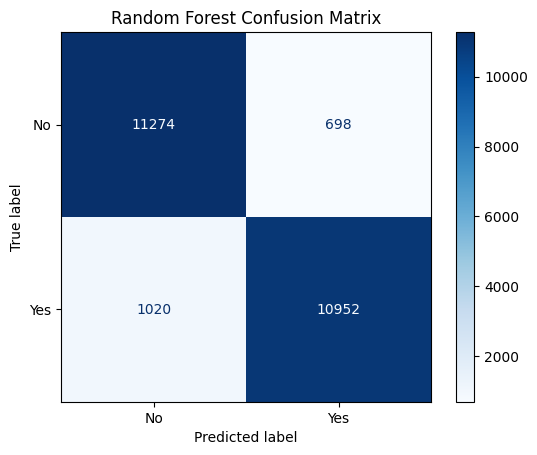

In [39]:
# Compare models
def compare_models(models, X_test, y_test):
    for name, model in models:
        if hasattr(model, "predict_proba"):  # For models like RandomForest
            y_pred_proba = model.predict_proba(X_test)[:, 1]
            y_pred = model.predict(X_test)
        else:  # For Neural Network
            y_pred_proba = model.predict(X_test).ravel()
            y_pred = (y_pred_proba > 0.5).astype("int32")

        # Evaluation Metrics
        accuracy = accuracy_score(y_test, y_pred)
        auc_score = roc_auc_score(y_test, y_pred_proba)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Print results
        print(f"\n{name} Evaluation:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"AUC: {auc_score:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        print("\nConfusion Matrix:")
        print(conf_matrix)

        # Display Confusion Matrix for each model
        plt.figure(figsize=(6, 6))
        ConfusionMatrixDisplay(conf_matrix, display_labels=['No', 'Yes']).plot(cmap='Blues')
        plt.title(f"{name} Confusion Matrix")
        plt.show()

# Compare the models
compare_models(models, X_test, y_test)



Plot the ROC Curves

749/749 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


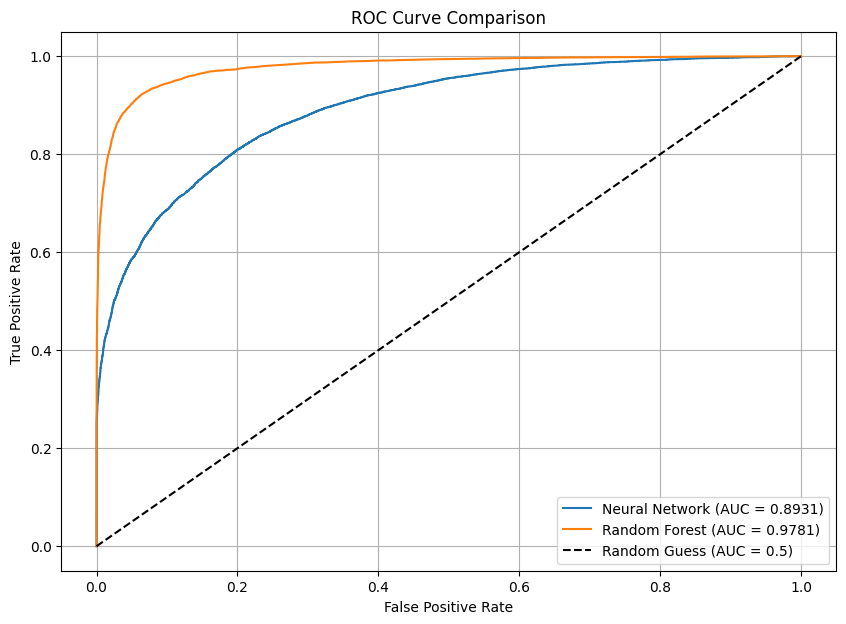

In [40]:
# Plot ROC Curve
def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 7))
    for name, model in models:
        if hasattr(model, "predict_proba"):  # For models like RandomForest
            y_pred_proba = model.predict_proba(X_test)[:, 1]
        else:  # For Neural Network
            y_pred_proba = model.predict(X_test).ravel()

        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.4f})")

    plt.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.5)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Comparison")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Plot the ROC Curve for all models
plot_roc_curve(models, X_test, y_test)
